<a href="https://colab.research.google.com/github/nish700/padai/blob/master/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.datasets

In [0]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [0]:
X = breast_cancer.data
Y = breast_cancer.target

In [0]:
data = pd.DataFrame(breast_cancer.data,columns = breast_cancer.feature_names)

In [0]:
data['class'] = breast_cancer.target

In [0]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [0]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


## Train Test Split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = data.drop('class',axis=1)
Y = data['class']

In [0]:
print(X.head())
Y.head()


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension           ...             worst radius  \
0                 0.0787

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [0]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.15,stratify=Y, random_state=1)

test size determines the size of X_test , Y_test
stratify ---
random_state -- makes sure that same data comes in training and test set on repeated execution



In [0]:
print(X_train.mean(),X_test.mean,Y_train.mean(),Y_test.mean())


mean radius                 14.026532
mean texture                19.339607
mean perimeter              91.335010
mean area                  644.858178
mean smoothness              0.096602
mean compactness             0.105495
mean concavity               0.089810
mean concave points          0.048778
mean symmetry                0.182178
mean fractal dimension       0.063044
radius error                 0.402481
texture error                1.207870
perimeter error              2.851445
area error                  39.842710
smoothness error             0.007018
compactness error            0.025852
concavity error              0.032690
concave points error         0.011935
symmetry error               0.020526
fractal dimension error      0.003834
worst radius                16.172619
worst texture               25.747039
worst perimeter            106.662360
worst area                 869.259420
worst smoothness             0.132844
worst compactness            0.260539
worst concav

##BInarisation of Input

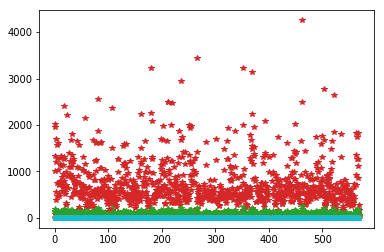

In [0]:
plt.plot(X_train,'*')
plt.show()

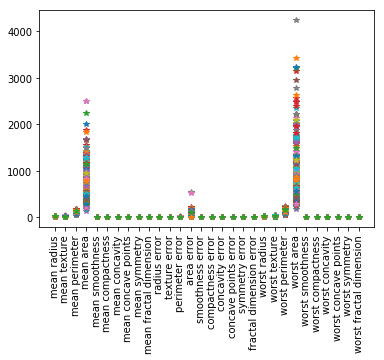

In [0]:
plt.plot(X_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [0]:
X_train_binarised_1 = X_train['mean area'].map(lambda x:1 if x<1000 else 0)

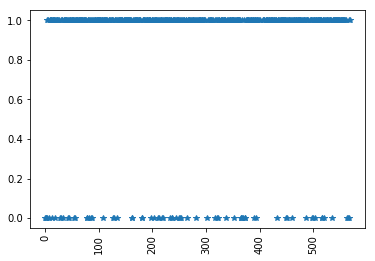

In [0]:
plt.plot(X_train_binarised_1.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [0]:
X_train_binarised = X_train.apply(pd.cut,bins=2,labels=[1,0])

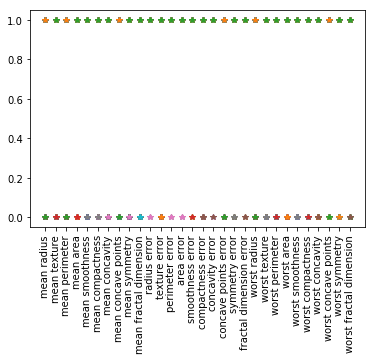

In [0]:
plt.plot(X_train_binarised.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [0]:
X_test_binarised = X_test.apply(pd.cut,bins=2,labels=[1,0])

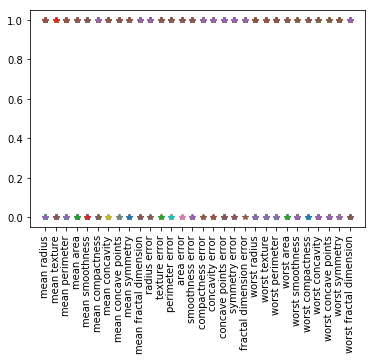

In [0]:
plt.plot(X_test_binarised.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [0]:
X_train_binarised = X_train_binarised.values
X_test_binarised = X_test_binarised.values

In [0]:
print(type(X_train_binarised))
type(X_test_binarised)

<class 'numpy.ndarray'>


numpy.ndarray

## Perceptron Class

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
X_train = X_train.values
Y_train = Y_train.values


In [0]:
X_test = X_test.values

$y=1 , \mbox{if}\sum_i w_i x_i >=b $

$y=0 , \mbox{otherwise}$


In [0]:
class Perceptron:
  
  def __init__(self):
    self.w=None
    self.b=None
    
  def model(self,x):
    return 1 if (np.dot(self.w,x)>= self.b) else 0
    
  def predict(self,X):
    Y=[]
    for x in X:
      result= self.model(x)
      Y.append(result)
    return np.array(Y)      
  
  def fit(self,X,Y, epochs=1, lr=1):
    self.w = np.ones(X.shape[1])
    self.b=0    
    accuracy={}
    max_accuracy=0
    wt_matrix = []
    
    for i in range(epochs):
      for x,y in zip(X,Y):
        y_pred = self.model(x)

        if y==0 and y_pred==1:
          self.w = self.w- lr * x
          self.b= self.b- lr * 1
        elif y==1 and y_pred==0:
          self.w = self.w + lr * x
          self.b = self.b + lr * 1
          
      wt_matrix.append(self.w)
      
      accuracy[i] = accuracy_score(self.predict(X),Y)
      if(accuracy[i]> max_accuracy):
        max_accuracy= accuracy[i]
        chkptw = self.w
        chkptb = self.b
        
    self.w = chkptw
    self.b = chkptb
    print(max_accuracy)
    plt.plot(accuracy.values())
    plt.ylim([0,1])
    plt.show()
    
    return np.array(wt_matrix)

Learning rate --> lr (fractional)

In [0]:
perceptron = Perceptron()

0.9213250517598344


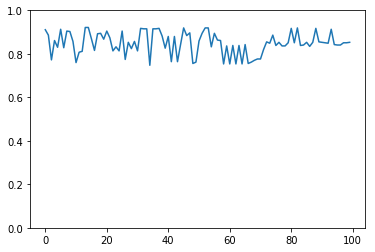

In [0]:
wt_matrix=perceptron.fit(X_train,Y_train,100)

In [0]:
Y_pred_train = perceptron.predict(X_train)
accuracy = accuracy_score(Y_pred_train, Y_train)
print(accuracy)

0.9213250517598344


In [0]:
Y_pred_test = perceptron.predict(X_test)
print(accuracy_score(Y_pred_test,Y_test))

0.9186046511627907


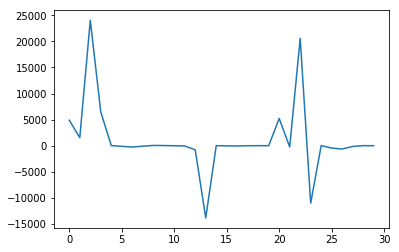

In [0]:
plt.plot(wt_matrix[-1,:])
plt.show()

In [0]:
from matplotlib import animation, rc
from IPython.display import HTML

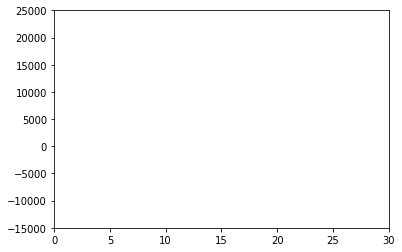

In [0]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, wt_matrix.shape[1]))
ax.set_ylim((-15000, 25000))

line, = ax.plot([], [], lw=2)

In [0]:
# animation function. This is called sequentially
def animate(i):
    x = list(range(wt_matrix.shape[1]))
    y = wt_matrix[i,:]
    line.set_data(x, y)
    return (line,)

In [0]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,frames=100, interval=200, blit=True)

In [0]:
HTML(anim.to_html5_video())